In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
df=pd.read_pickle('data/soccerDBNew2_n.pkl')

In [4]:
eda=df[['home_team', 'away_team', 'home_team_score', 'away_team_score','city','datetime','game']]

In [5]:
eda['winner']=1

In [6]:
%%time
contador=0
for n in range (3419):
    if eda['home_team_score'][contador] > eda['away_team_score'][contador]:
        eda['winner'][contador]='HW'
    elif eda['home_team_score'][contador] < eda['away_team_score'][contador]:
        eda['winner'][contador]='AW'
    else:
        eda['winner'][contador]='D'
    contador+=1

Wall time: 3min 46s


In [7]:
eda.tail()

,home_team,away_team,home_team_score,away_team_score,city,datetime,game,winner
3414,Palmeiras,Vitória,3,2,"São Paulo, São Paulo",2018-02-12,8,HW
3415,Sport,Santos,2,1,"Recife, Pernambuco",2018-02-12,8,HW
3416,Bahia,Cruzeiro,0,0,"Salvador de Bahia, Bahia",2018-02-12,8,D
3417,Ceará,Vasco,0,0,"Fortaleza, Ceará",2018-02-12,8,D
3418,Grêmio,Corinthians,1,0,"Porto Alegre, Rio Grande do Sul",2018-02-12,8,HW


# Proporção de vitórias por mando

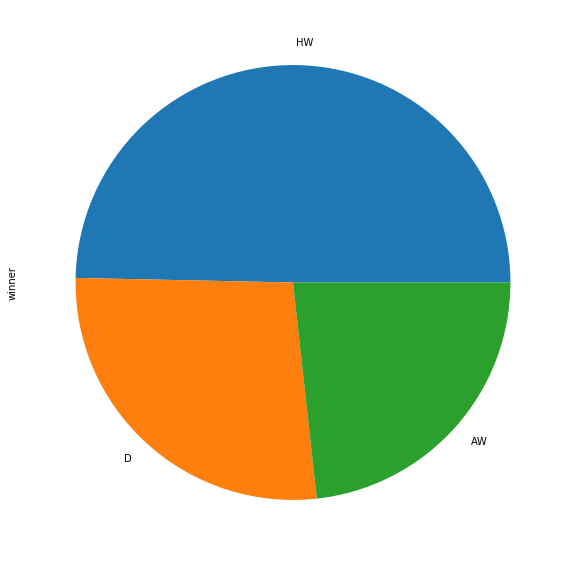

In [79]:
eda['winner'].value_counts().plot.pie(figsize=(15,10))

In [55]:
times=eda[['home_team','away_team','winner','datetime']]

In [74]:
mask=times[(times.datetime.dt.year > 2009) & (times.datetime.dt.year < 2011)]

In [29]:
times.head()

,home_team,away_team,winner,datetime
0,Palmeiras,Vitória,HW,2010-08-05
1,Internacional,Cruzeiro,AW,2010-09-05
2,Flamengo,São Paulo,D,2010-09-05
3,Atlético GO,Grêmio,D,2010-08-05
4,Atlético MG,Vasco,HW,2010-09-05


In [54]:
times.groupby(['home_team'])['winner'].value_counts()

home_team    winner
América MG   HW         22
             AW         18
             D          17
Atlético GO  AW         34
             HW         25
             D          17
Atlético MG  HW        103
             AW         36
             D          32
Atlético PR  HW         89
             D          40
             AW         23
Avaí         D          26
             HW         26
             AW         24
Bahia        HW         45
             D          38
             AW         31
Botafogo     HW         76
             D          44
             AW         32
Ceará        HW         23
             D          22
             AW         12
Chapecoense  HW         44
             D          26
             AW         24
Corinthians  HW        105
             D          47
             AW         19
                      ... 
Palmeiras    HW         81
             AW         38
             D          33
Paraná       D          10
             AW          6
        

In [12]:
times.groupby(['away_team'])['winner'].value_counts()

away_team    winner
América MG   HW        41
             D         13
             AW         3
Atlético GO  HW        40
             D         22
             AW        14
Atlético MG  HW        74
             D         52
             AW        44
Atlético PR  HW        88
             AW        32
             D         32
Avaí         HW        47
             D         16
             AW        13
Bahia        HW        57
             D         34
             AW        23
Botafogo     HW        74
             AW        39
             D         39
Ceará        HW        32
             D         18
             AW         7
Chapecoense  HW        49
             D         28
             AW        18
Corinthians  HW        68
             D         52
             AW        51
                       ..
Palmeiras    HW        64
             D         45
             AW        43
Paraná       HW        17
             AW         1
             D          1
Ponte Preta  HW   

In [13]:
times.groupby(['winner'])['home_team'].value_counts()

winner  home_team     
AW      Fluminense        41
        Vitória           39
        Palmeiras         38
        Atlético MG       36
        Atlético GO       34
        Flamengo          34
        Cruzeiro          33
        Botafogo          32
        Bahia             31
        Coritiba          31
        São Paulo         31
        Vasco             31
        Figueirense       29
        Grêmio            29
        Internacional     29
        Ponte Preta       29
        Santos            28
        Goiás             25
        Avaí              24
        Chapecoense       24
        Sport             24
        Atlético PR       23
        Corinthians       19
        América MG        18
        Náutico           16
        Criciúma          14
        Ceará             12
        Santa Cruz        10
        Grêmio Barueri     9
        Portuguesa         7
                          ..
HW      Santos            99
        Cruzeiro          94
        São Paulo   

In [14]:
times.groupby(['winner'])['away_team'].value_counts()

winner  away_team     
AW      Cruzeiro          57
        Fluminense        53
        São Paulo         53
        Corinthians       51
        Grêmio            51
        Flamengo          48
        Atlético MG       44
        Palmeiras         43
        Santos            42
        Botafogo          39
        Internacional     37
        Vasco             33
        Atlético PR       32
        Vitória           25
        Bahia             23
        Coritiba          21
        Figueirense       20
        Sport             20
        Chapecoense       18
        Goiás             15
        Atlético GO       14
        Avaí              13
        Ponte Preta       13
        Ceará              7
        Portuguesa         6
        Criciúma           5
        América MG         3
        Náutico            3
        Grêmio Barueri     2
        Guarani            1
                          ..
HW      Fluminense        76
        São Paulo         76
        Cruzeiro    

# Vitórias por mando em casa

In [16]:
temp=times.groupby(['winner'])['home_team'].value_counts()
temp2=pd.DataFrame(temp)
temp2=temp2.rename(columns={'home_team':'#_vitorias'})
temp2=temp2.reset_index()
vitorias_hw=temp2[temp2['winner']=='HW']

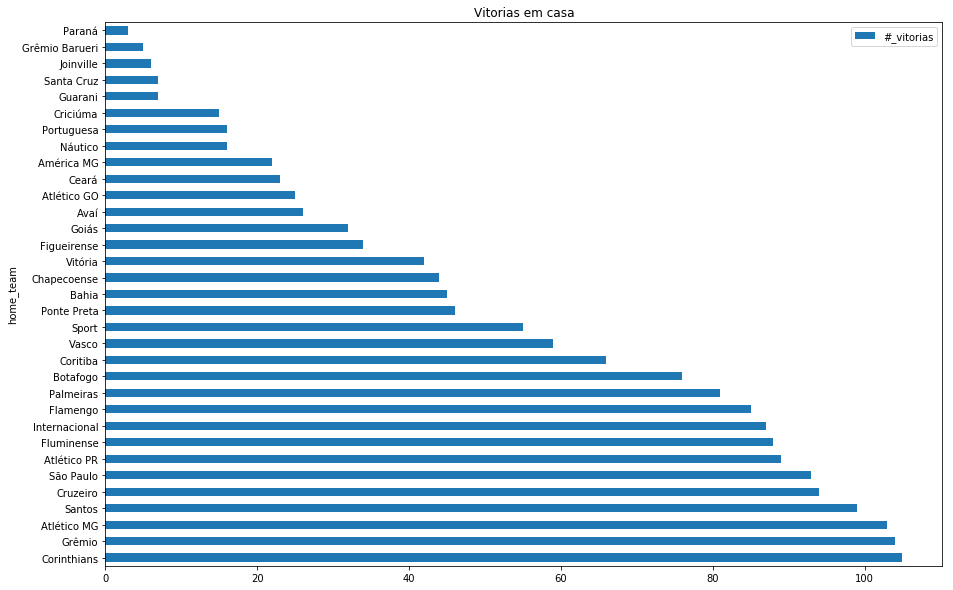

In [43]:
vitorias_hw.set_index('home_team').plot.barh(figsize=(15,10), title='Vitorias em casa')

# Empates em casa

In [40]:
empates_hw=temp2[temp2['winner']=='D']

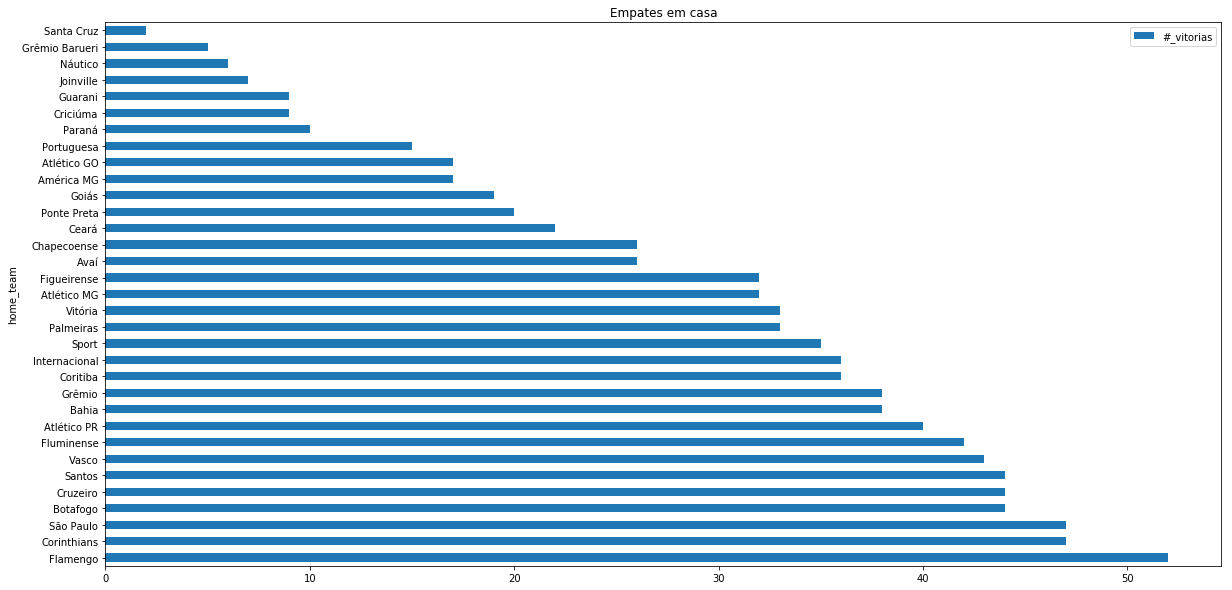

In [42]:
empates_hw.set_index('home_team').plot.barh(figsize=(20,10),title='Empates em casa')

# Vitórias fora de casa

In [21]:
temp3=times.groupby(['winner'])['away_team'].value_counts()
temp3=pd.DataFrame(temp3)
temp3=temp3.rename(columns={'away_team':'#_vitorias'})
temp3=temp3.reset_index()
vitorias_aw=temp3[temp3['winner']=='AW']

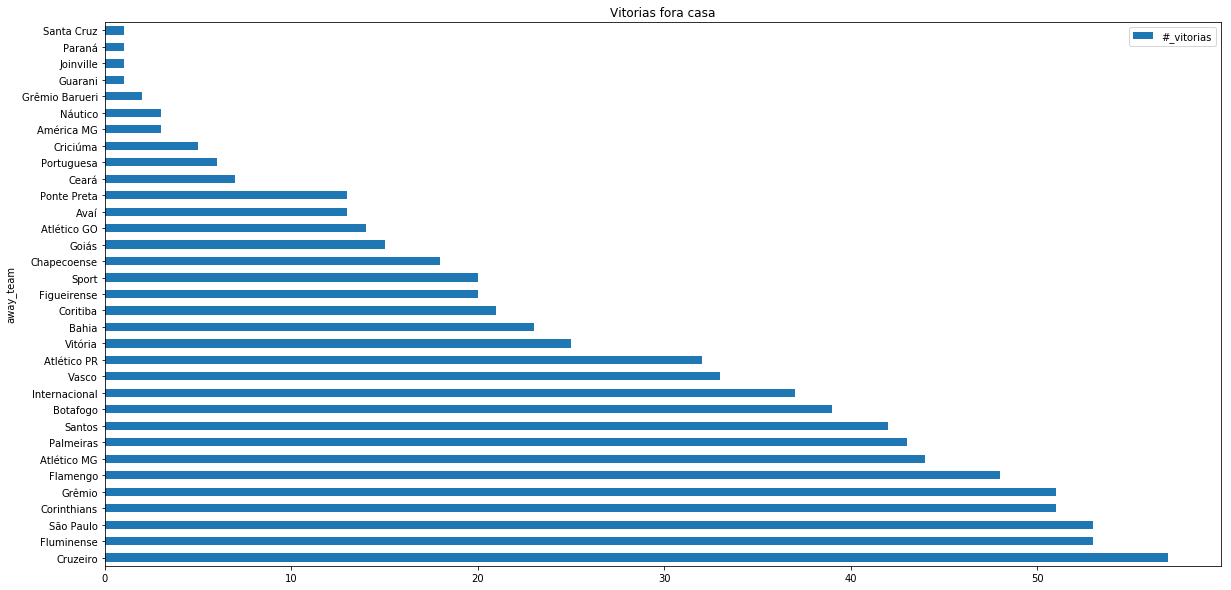

In [28]:
vitorias_aw.set_index('away_team').plot.barh(figsize=(20,10),title='Vitorias fora casa')

# Empates fora de casa

In [38]:
empates_aw=temp3[temp3['winner']=='D']

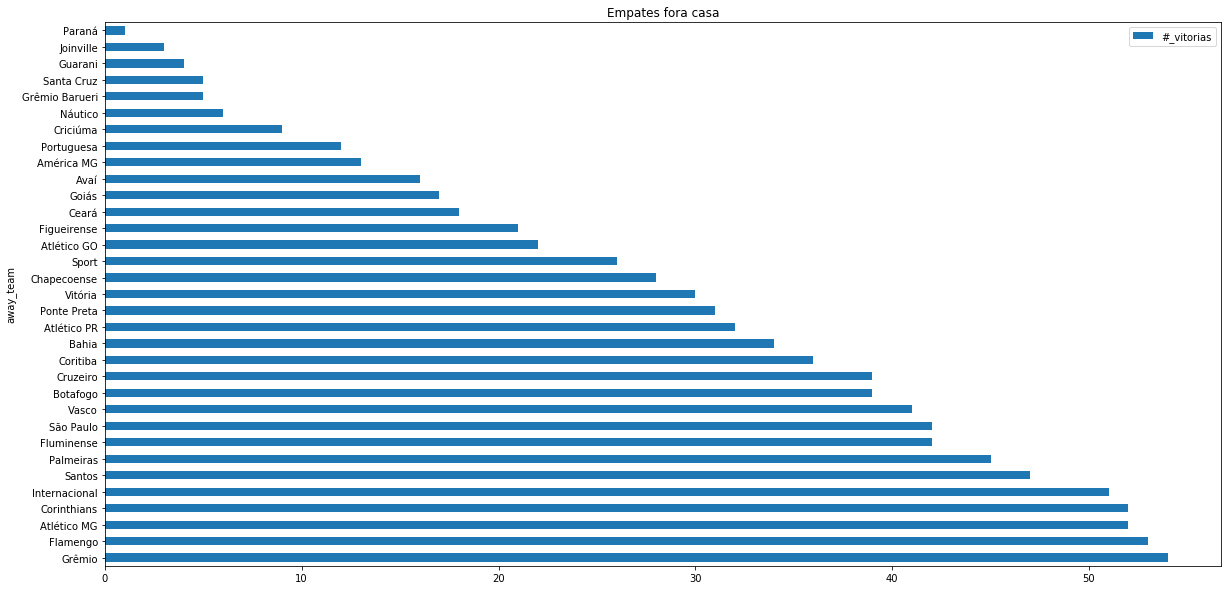

In [39]:
empates_aw.set_index('away_team').plot.barh(figsize=(20,10),title='Empates fora casa')